In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LinearRegression
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from sklearn.preprocessing import StandardScaler 
df1 = pd.read_csv('/content/new_olist_order_items_dataset.csv')
df2 = pd.read_csv('/content/new_olist_order_payments_dataset.csv')
df1

,order_id,order_item_id,product_id,seller_id,price,freight_value,shipping_limit_date_yr,shipping_limit_date_mo,shipping_limit_date_dy,shipping_limit_date_hr,shipping_limit_date_mi,shipping_limit_date_sec
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.90,13.29,2017,9,19,9,45,35
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,239.90,19.93,2017,5,3,11,5,13
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,199.00,17.87,2018,1,18,14,48,30
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,12.99,12.79,2018,8,15,10,10,18
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,199.90,18.14,2017,2,13,13,57,51
...,...,...,...,...,...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,299.99,43.41,2018,5,2,4,11,1
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,350.00,36.53,2018,7,20,4,31,48
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,99.90,16.95,2017,10,30,17,14,25
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,55.99,8.72,2017,8,21,0,4,32


In [15]:
df3 = df1.merge(df2,on='order_id')
df3

,order_id,order_item_id,product_id,seller_id,price,freight_value,shipping_limit_date_yr,shipping_limit_date_mo,shipping_limit_date_dy,shipping_limit_date_hr,shipping_limit_date_mi,shipping_limit_date_sec,payment_sequential,payment_type,payment_installments,payment_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.90,13.29,2017,9,19,9,45,35,1,credit_card,2,72.19
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,239.90,19.93,2017,5,3,11,5,13,1,credit_card,3,259.83
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,199.00,17.87,2018,1,18,14,48,30,1,credit_card,5,216.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,12.99,12.79,2018,8,15,10,10,18,1,credit_card,2,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,199.90,18.14,2017,2,13,13,57,51,1,credit_card,3,218.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117596,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,299.99,43.41,2018,5,2,4,11,1,1,boleto,1,343.40
117597,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,350.00,36.53,2018,7,20,4,31,48,1,boleto,1,386.53
117598,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,99.90,16.95,2017,10,30,17,14,25,1,credit_card,3,116.85
117599,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,55.99,8.72,2017,8,21,0,4,32,1,credit_card,3,64.71


In [16]:
# create three dummy variables using get_dummies, then exclude the first dummy column
area_dummies = pd.get_dummies(df3['payment_type'], prefix='payment_type').iloc[:, 1:]
area_dummies

,payment_type_credit_card,payment_type_debit_card,payment_type_voucher
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
117596,0,0,0
117597,0,0,0
117598,1,0,0
117599,1,0,0


In [17]:
# concatenate the dummy variable columns onto the original DataFrame (axis=0 means rows, axis=1 means columns)
df3= pd.concat([df3, area_dummies], axis=1)
df3

,order_id,order_item_id,product_id,seller_id,price,freight_value,shipping_limit_date_yr,shipping_limit_date_mo,shipping_limit_date_dy,shipping_limit_date_hr,shipping_limit_date_mi,shipping_limit_date_sec,payment_sequential,payment_type,payment_installments,payment_value,payment_type_credit_card,payment_type_debit_card,payment_type_voucher
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.90,13.29,2017,9,19,9,45,35,1,credit_card,2,72.19,1,0,0
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,239.90,19.93,2017,5,3,11,5,13,1,credit_card,3,259.83,1,0,0
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,199.00,17.87,2018,1,18,14,48,30,1,credit_card,5,216.87,1,0,0
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,12.99,12.79,2018,8,15,10,10,18,1,credit_card,2,25.78,1,0,0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,199.90,18.14,2017,2,13,13,57,51,1,credit_card,3,218.04,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117596,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,299.99,43.41,2018,5,2,4,11,1,1,boleto,1,343.40,0,0,0
117597,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,350.00,36.53,2018,7,20,4,31,48,1,boleto,1,386.53,0,0,0
117598,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,99.90,16.95,2017,10,30,17,14,25,1,credit_card,3,116.85,1,0,0
117599,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,55.99,8.72,2017,8,21,0,4,32,1,credit_card,3,64.71,1,0,0


In [18]:
df3=df3.drop(['order_id','product_id','seller_id','payment_type'],axis=1)

In [19]:
print(df3.price.sum())
print(df3.freight_value.sum())
print(df3.payment_value.sum())
## in sales prediction we have to predict the payment_value not the price because price can be up or low in specific 
## season but payment describe the amount of money spend during payment of specfic product so it detrmine the amount of sales

14209115.340000002
2357428.51
20308134.709999997


In [20]:
df3.isna().sum()

order_item_id               0
price                       0
freight_value               0
shipping_limit_date_yr      0
shipping_limit_date_mo      0
shipping_limit_date_dy      0
shipping_limit_date_hr      0
shipping_limit_date_mi      0
shipping_limit_date_sec     0
payment_sequential          0
payment_installments        0
payment_value               0
payment_type_credit_card    0
payment_type_debit_card     0
payment_type_voucher        0
dtype: int64

In [21]:
df3=df3.dropna()

In [22]:
scaler =StandardScaler()
X =df3.drop(columns = ['payment_value'])
X_scaled = scaler.fit_transform(X)
y=df3['payment_value']

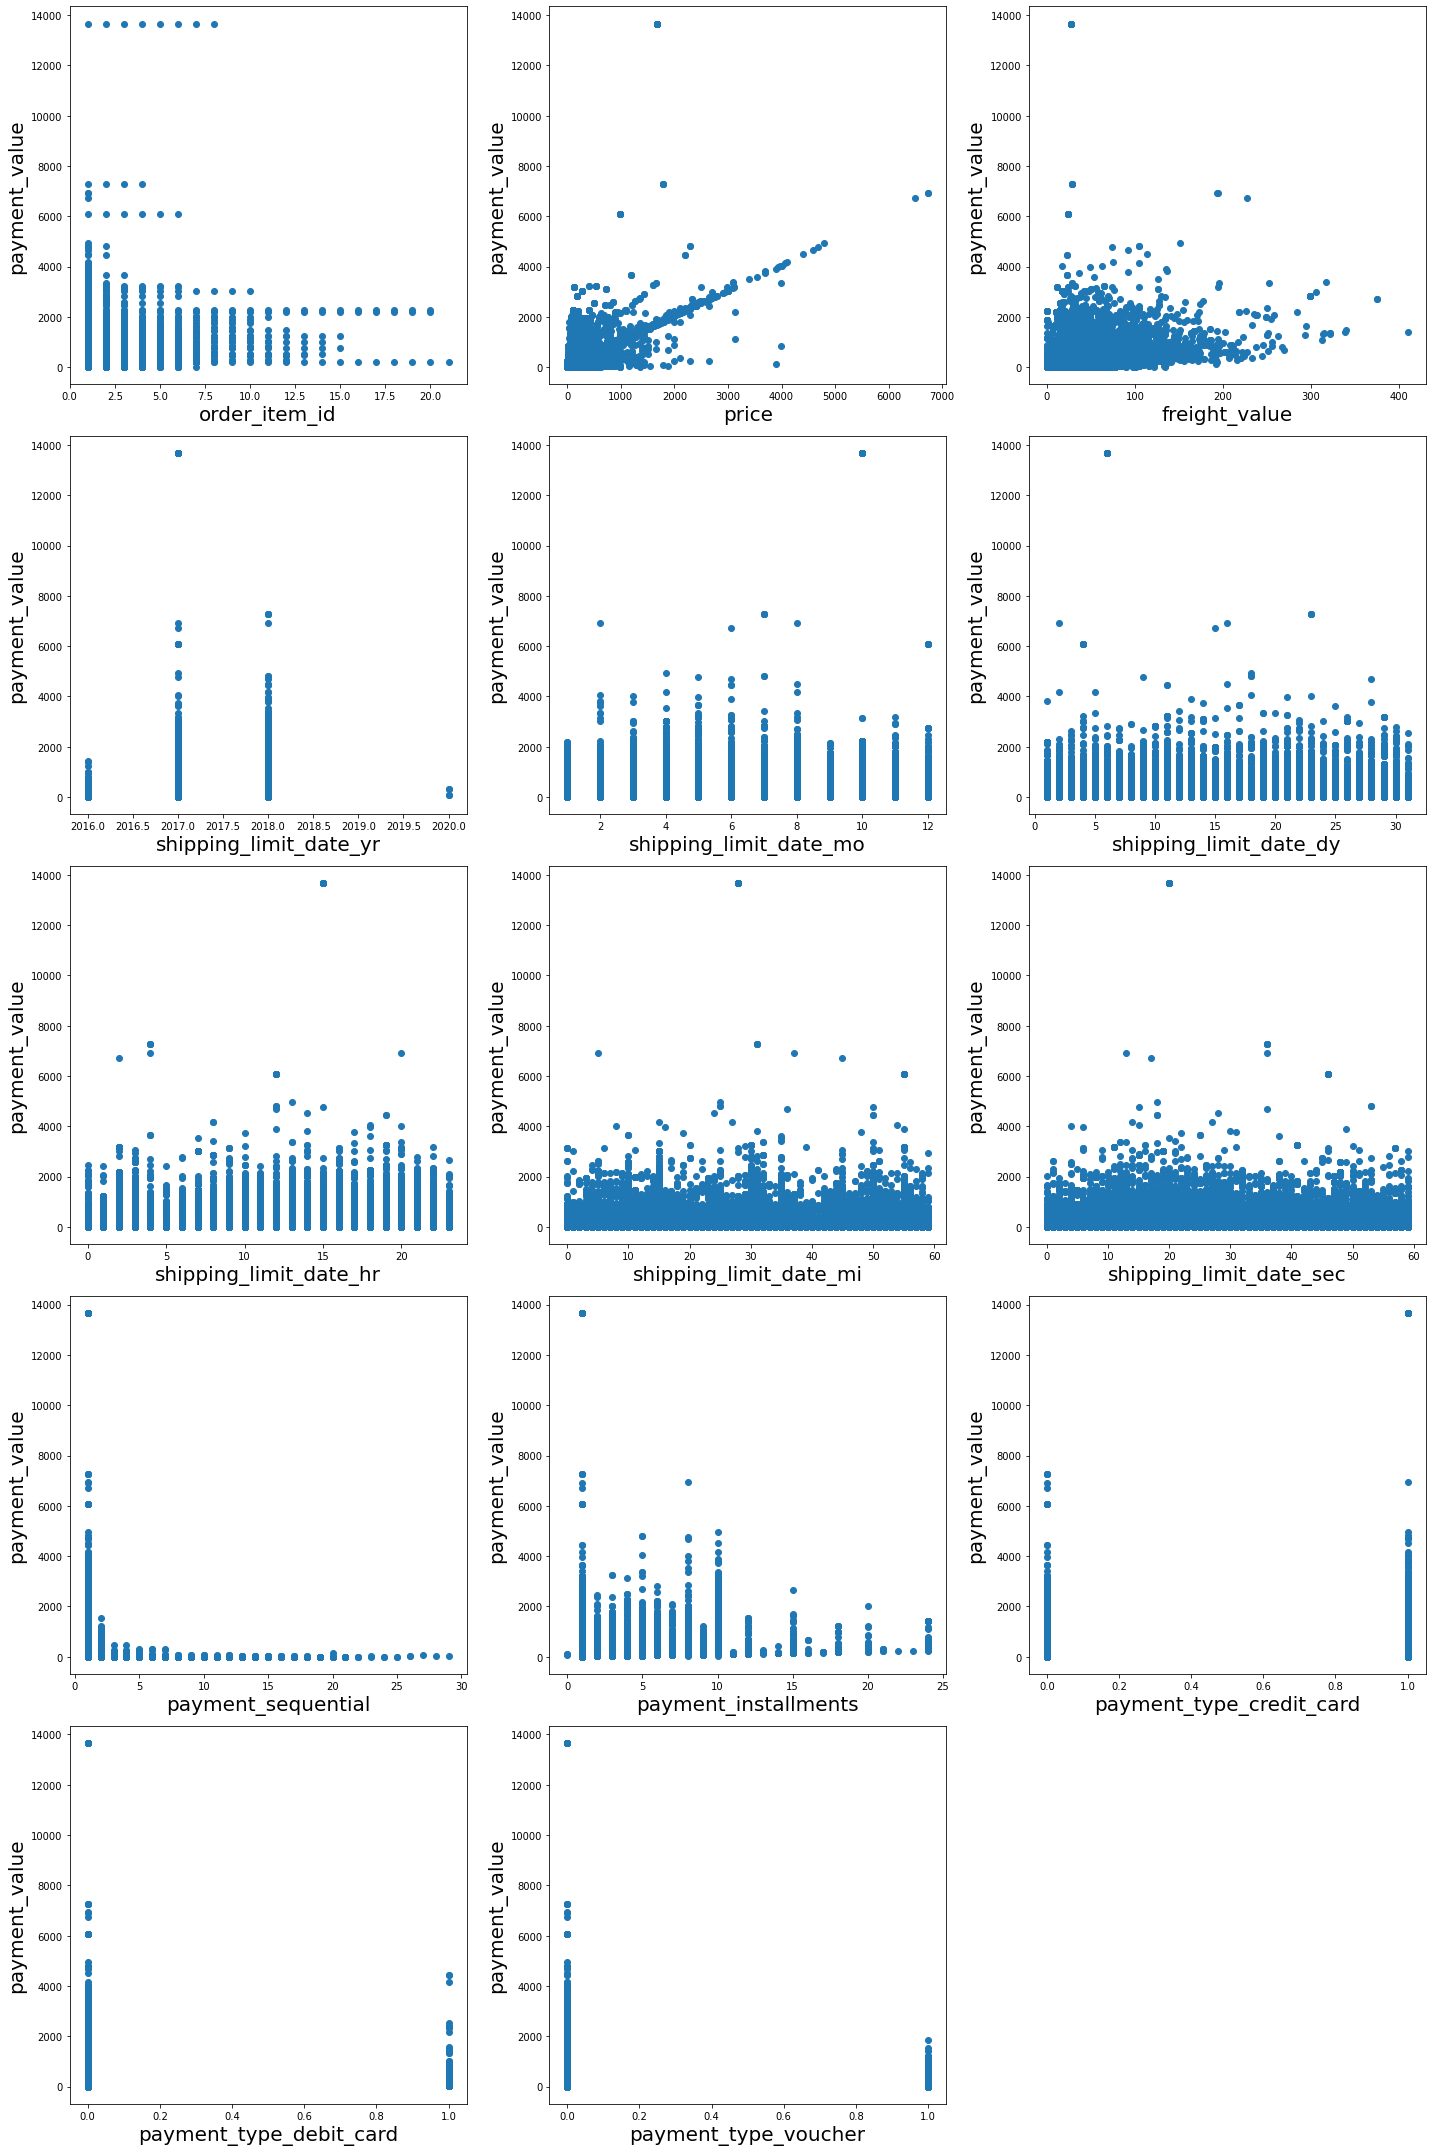

In [23]:
plt.figure(figsize=(20,30), facecolor='white')
plotnumber = 1

for column in X:
    if plotnumber<=15 :
        ax = plt.subplot(5,3,plotnumber)
        plt.scatter(X[column],y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('payment_value',fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [24]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size = 0.25,random_state=355)

In [25]:
regression = LinearRegression()

regression.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [26]:
# saving the model to the local file system
filename = 'finalized_model.pickle'
pickle.dump(regression, open(filename, 'wb'))

In [27]:
# prediction using the saved model
loaded_model = pickle.load(open(filename, 'rb'))
#a=loaded_model.predict(scaler.transform([[1,58.90,13.29,2017,9,19,9,45,35,1,2,1,0,0]]))
a=loaded_model.predict(scaler.transform(x_test[1:2]))
a
# 1df3 array([73.22730949])

array([-5111.23281312])

In [28]:
Y_predicted=loaded_model.predict(x_test)

In [29]:
from sklearn.metrics import mean_squared_error
import math
print(mean_squared_error(y_test, Y_predicted))
print(math.sqrt(mean_squared_error(y_test, Y_predicted)))
#27380.495546558326
#165.470527727926


27380.495546558304
165.47052772792594


In [30]:
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_test, Y_predicted))
#MAE: 45.607169984972195

45.607169984972074


In [31]:
# Let's create a function to create adjusted R-Squared
def adj_r2(x,y):
    r2 = regression.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

In [32]:
# accuracy of our regression
regression.score(x_train,y_train)

0.6619215690372877

In [33]:
adj_r2(x_test,y_test)
# linear regression giving less accuracy score on this task

0.6422583514677138

In [36]:
#completely overfeated
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)
dt.score(x_train,y_train)

0.9999999594797392

In [38]:
# accuracy of our regression tree
dt.score(x_test,y_test)

0.7744341467311183

In [70]:
# overfeated model on training set becuase accuracy on training set is 98% whereas on test set is 85%
from sklearn.ensemble import RandomForestRegressor
rand_clf = RandomForestRegressor()
rand_clf.fit(x_train,y_train)
rand_clf.score(x_train,y_train)

0.9811869576507277

In [50]:
rand_clf.score(x_test,y_test)

0.8596313986245283

In [69]:
# best perfoming model not overfeated not underfeated with good accuracie score
from xgboost import XGBRegressor
model = XGBRegressor()
model.fit(x_train,y_train)
model.score(x_train,y_train)

0.8790986549020033

In [61]:
model.score(x_test,y_test)

0.8524355248680882

In [68]:
#gives very low accuracy score
from sklearn.svm import SVR
svr=SVR(C=1.0, epsilon=0.2)
svr.fit(x_train,y_train)
svr.score(x_test,y_test)

0.30782932315362044

In [71]:
svr.score(x_train,y_train)

0.3259884148964567

In [ ]:
# xgboost giving us best model which  is not overfeated on training set like randomforest does above